# French C2C Model Bias Analysis

## Import Dependencies

In [1]:
# !pip install researchpy

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import researchpy as rp

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
from dataclasses import dataclass

In [5]:
%matplotlib inline

In [6]:
pd.options.display.max_columns = 250
pd.options.display.max_rows = 250

In [7]:
from sklearn.metrics import confusion_matrix

# Custom functions

#### Dataclass for confusion matrix results

In [8]:
@dataclass
class cmatrix:
    name: str
    TP: int
    FP: int
    TN: int
    FN: int    
    PPV: float
    TPR: float
    FDR: float
    FPR: float
    FOR: float
    FNR: float
    NPV: float
    TNR: float

#### Helper function to generate dataclass _cmatrix_

In [9]:
def gen_dataclass(actual, pred, name):
    [TN, FP, FN, TP] = confusion_matrix(actual, pred).ravel()
    

    PPV = TP / (TP + FP)  # positive predictive value
    FDR = FP / (TP + FP)  # false discovery rate
    
    TPR = TP / (TP + FN)  # true positive rate
    FNR = FN / (TP + FN)  # false negative rate
    
    TNR = TN / (TN + FP)  # true negative rate
    FPR = FP / (TN + FP)  # false positive rate

    FOR = FN / (TN + FN)  # false omission rate
    NPV = TN / (TN + FN)  # negative predictive value

    
    return cmatrix(name, TP, FP, TN, FN, PPV, TPR, FDR, FPR, FOR, FNR, NPV, TNR)

#### Extract bias metrics

In [10]:
def bias_metrics(df):
    '''
    - takes dataframe as input
    - returns dataclass whose components are statistical measures from a confusion matrix
    particular to relu, tanh, elu, and leaky relu dataframe series
    '''
    actual = df.target.values
    relu = df.pred_relu.values
    tanh = df.pred_tanh.values
    elu = df.pred_elu.values
    leaky = df.pred_leaky.values
    
    relu = gen_dataclass(actual, relu, "relu")
    tanh = gen_dataclass(actual, tanh, "tanh")
    elu = gen_dataclass(actual, elu, "elu")
    leaky = gen_dataclass(actual, leaky, "leaky")
    
    return relu, tanh, elu, leaky

# Import Data

In [11]:
data = pd.read_parquet("french_results_mk6_v1.parquet")

In [12]:
data.head()

,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,productsWished,productsBought,hasAnyApp,hasAndroidApp,hasIosApp,hasProfilePicture,daysSinceLastLogin,seniorityAsMonths,civGen_1,civGen_2,civGen_3,gender,countryCode_ad,countryCode_ae,countryCode_af,countryCode_ag,countryCode_ai,countryCode_al,countryCode_am,countryCode_an,countryCode_ao,countryCode_aq,countryCode_ar,countryCode_as,countryCode_at,countryCode_au,countryCode_aw,countryCode_az,countryCode_ba,countryCode_bb,countryCode_bd,countryCode_be,countryCode_bf,countryCode_bg,countryCode_bh,countryCode_bj,countryCode_bl,countryCode_bm,countryCode_bn,countryCode_bo,countryCode_br,countryCode_bs,countryCode_bv,countryCode_bw,countryCode_by,countryCode_bz,countryCode_ca,countryCode_cd,countryCode_cf,countryCode_cg,countryCode_ch,countryCode_ci,countryCode_cl,countryCode_cm,countryCode_cn,countryCode_co,countryCode_cr,countryCode_cu,countryCode_cy,countryCode_cz,countryCode_de,countryCode_dj,countryCode_dk,countryCode_dm,countryCode_do,countryCode_dz,countryCode_ec,countryCode_ee,countryCode_eg,countryCode_er,countryCode_es,countryCode_et,countryCode_fi,countryCode_fj,countryCode_fk,countryCode_fo,countryCode_fr,countryCode_ga,countryCode_gb,countryCode_gd,countryCode_ge,countryCode_gg,countryCode_gh,countryCode_gi,countryCode_gm,countryCode_gn,countryCode_gp,countryCode_gr,countryCode_gs,countryCode_gt,countryCode_gu,countryCode_gy,countryCode_hk,countryCode_hn,countryCode_hr,countryCode_ht,countryCode_hu,countryCode_ic,countryCode_id,countryCode_ie,countryCode_il,countryCode_im,countryCode_in,countryCode_iq,countryCode_ir,countryCode_is,countryCode_it,countryCode_je,countryCode_jm,countryCode_jo,countryCode_jp,countryCode_ke,countryCode_kg,countryCode_kh,countryCode_ki,countryCode_kn,countryCode_kp,countryCode_kr,countryCode_kw,countryCode_ky,countryCode_kz,countryCode_la,countryCode_lb,countryCode_lc,countryCode_li,countryCode_lk,countryCode_lt,countryCode_lu,countryCode_lv,countryCode_ly,countryCode_ma,countryCode_mc,countryCode_md,countryCode_mg,countryCode_mk,countryCode_ml,countryCode_mm,countryCode_mn,countryCode_mo,countryCode_mq,countryCode_mr,countryCode_mt,countryCode_mu,countryCode_mv,countryCode_mx,countryCode_my,countryCode_na,countryCode_nc,countryCode_ne,countryCode_nf,countryCode_ng,countryCode_ni,countryCode_nl,countryCode_no,countryCode_np,countryCode_nz,countryCode_om,countryCode_pa,countryCode_pe,countryCode_pf,countryCode_ph,countryCode_pk,countryCode_pl,countryCode_pr,countryCode_pt,countryCode_pw,countryCode_py,countryCode_qa,countryCode_re,countryCode_ro,countryCode_rs,countryCode_ru,countryCode_rw,countryCode_sa,countryCode_se,countryCode_sg,countryCode_si,countryCode_sj,countryCode_sk,countryCode_sn,countryCode_sr,countryCode_sv,countryCode_sy,countryCode_sz,countryCode_tc,countryCode_td,countryCode_tg,countryCode_th,countryCode_tj,countryCode_tn,countryCode_tr,countryCode_tt,countryCode_tw,countryCode_tz,countryCode_ua,countryCode_ug,countryCode_um,countryCode_us,countryCode_uy,countryCode_uz,countryCode_vc,countryCode_ve,countryCode_vg,countryCode_vi,countryCode_vn,countryCode_vu,countryCode_ws,countryCode_yt,countryCode_za,countryCode_zm,countryCode_zw,language_de,language_en,language_es,language_fr,language_it,target,pred_relu,pred_tanh,pred_elu,pred_leaky
0,3,8,0,0,0,0,0,0,0,0,0,1,699,106,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.0,0,0,0,0
1,3,8,41,0,0,0,0,0,1,0,1,1,605,107,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [13]:
features = list(data.columns[-5:])
features

['target', 'pred_relu', 'pred_tanh', 'pred_elu', 'pred_leaky']

#### Inspect Data

**Note:** The following confusion matrix should return a list of four (4) numbers, with zero (0) false negatives and false positives. Example: array([100, 0, 0, 10])

In [14]:
confusion_matrix(data.target, data.target).ravel()

array([28048,     0,     0,  1626], dtype=int64)

In [15]:
print("Name\t    Total   TP     FP   TN     FN")
for f in features:
    total = data[f].sum()
    try:
        [tn, fp, fn, tp] = confusion_matrix(data.target, data[f]).ravel()
    except Exception:
        pass
    print(f"{f:10s}: {total:5.0f}  {tp:5.0f} {fp:5.0f} {tn:6.0f} {fn:5.0f}")

Name	    Total   TP     FP   TN     FN
target    :  1626   1626     0  28048     0
pred_relu :     0      0     0  28048  1626
pred_tanh :   696    565   131  27917  1061
pred_elu  :   539    484    55  27993  1142
pred_leaky:     0      0     0  28048  1626


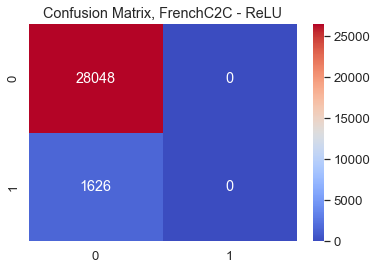

In [16]:
cm_relu = confusion_matrix(data.target, data.pred_relu)
sns.set(font_scale=1.2)
sns.heatmap(cm_relu, annot=True, cmap="coolwarm", robust=True, fmt='g')
plt.title("Confusion Matrix, FrenchC2C - ReLU")
plt.show()

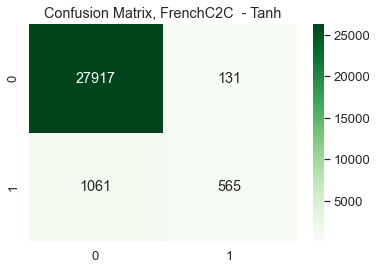

In [17]:
cm_tanh = confusion_matrix(data.target, data.pred_tanh)
sns.set(font_scale=1.2)
sns.heatmap(cm_tanh, annot=True, cmap="Greens", robust=True, fmt='g')
plt.title("Confusion Matrix, FrenchC2C  - Tanh")
plt.show()

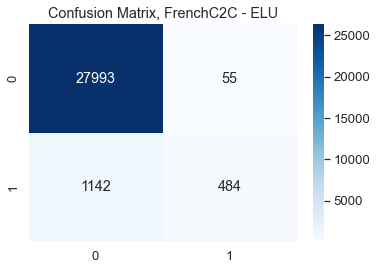

In [18]:
cm_elu = confusion_matrix(data.target, data.pred_elu)
sns.set(font_scale=1.2)
sns.heatmap(cm_elu, annot=True, cmap="Blues", robust=True, fmt='g')
plt.title("Confusion Matrix, FrenchC2C - ELU")
plt.show()

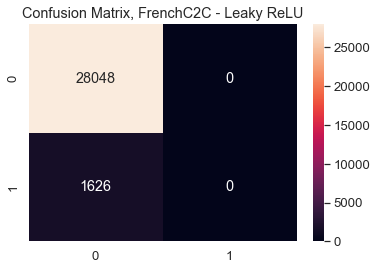

In [19]:
cm_leaky = confusion_matrix(data.target, data.pred_leaky)
sns.set(font_scale=1.2)
sns.heatmap(cm_leaky, annot=True, fmt='g')
plt.title("Confusion Matrix, FrenchC2C - Leaky ReLU")
plt.show()

## Separate by protected feature

In [20]:
# group A : protected attribute
# group B : other
GroupA = data[data["gender"] == 1]
GroupB = data[data["gender"] == 0]
attribute = ["female", "male"]

In [21]:
GroupA.shape

(22722, 227)

In [22]:
GroupB.shape

(6952, 227)

In [23]:
data.shape

(29674, 227)

##### Control stats, baseline

In [24]:
Cr, Ct, Ce, Cl = bias_metrics(data)

In [25]:
Ct.TPR

0.34747847478474786

##### Stats for Group A and Group B dataframes

In [26]:
Ar, At, Ae, Al = bias_metrics(GroupA)
Br, Bt, Be, Bl = bias_metrics(GroupB)

In [27]:
At.TPR

0.3566610455311973

# Bias Testing

#### Predictive parity

Compares precision (or positive predictive value, PPV) between group with protected attribute and without protected attribute. In this instance female group with male group

In [28]:
pp = [
    Ar.PPV == Br.PPV,
    At.PPV == Bt.PPV,
    Ae.PPV == Be.PPV,
    Al.PPV == Bl.PPV
]

In [29]:
pp_diff_r = 1 - (min(Ar.PPV,Br.PPV)/ max(Ar.PPV, Br.PPV))
pp_diff_t = 1 - (min(At.PPV, Bt.PPV)/ max(At.PPV, Bt.PPV))
pp_diff_e = 1 - (min(Ae.PPV, Be.PPV)/ max(Ae.PPV, Be.PPV))
pp_diff_l = 1 - (min(Al.PPV, Bl.PPV)/ max(Al.PPV, Bl.PPV))

In [115]:
print("Predictive parity -")
one = "PPV"
two = "FDR"
print(f"Name\t{one}\t{two}\t{one:11s}{two:10s}\t% Difference")
print(f"{Ar.name}\t{pp[0]}\t{Ar.FDR == Br.FDR}\t{Ar.PPV:0.5f}\t{Br.PPV:6.5f}\t\t{pp_diff_r:0.5f}")
print(f"{At.name}\t{pp[1]}\t{At.FDR == Bt.FDR}\t{At.PPV:0.5f}\t{Bt.PPV:10.5f}\t{pp_diff_t:0.5f}")
print(f"{Ae.name}\t{pp[2]}\t{Ae.FDR == Be.FDR}\t{Ae.PPV:0.5f}\t{Be.PPV:10.5f}\t{pp_diff_e:0.5f}")
print(f"{Al.name}\t{pp[3]}\t{Al.FDR == Bl.FDR}\t{Al.PPV:0.5f}\t{Bl.PPV:6.5f}\t\t{pp_diff_l:0.5f}")

Predictive parity -
Name	PPV	FDR	PPV        FDR       	% Difference
relu	False	False	nan	   nan		nan
tanh	False	False	0.81190	   0.81143	0.00058
elu	False	False	0.89588	   0.90476	0.00981
leaky	False	False	nan	   nan		nan


In [31]:
Cr

cmatrix(name='relu', TP=0, FP=0, TN=28048, FN=1626, PPV=nan, TPR=0.0, FDR=nan, FPR=0.0, FOR=0.054795443822875246, FNR=1.0, NPV=0.9452045561771247, TNR=1.0)

#### Predictive Equality

Also called the False Positive Error Balance, this metric considers compares the false positive rates (FPR) between groups.

In [32]:
pe = [
    Ar.FPR == Br.FPR,
    At.FPR == Bt.FPR,
    Ae.FPR == Be.FPR,
    Al.FPR == Bl.FPR    
]

In [33]:
pe_diff_r = 1-(min(Ar.FPR, Br.FPR)/max(Ar.FPR, Br.FPR))
pe_diff_t = 1-(min(At.FPR, Bt.FPR)/max(At.FPR, Bt.FPR))
pe_diff_e = 1-(min(Ae.FPR, Be.FPR)/max(Ae.FPR, Be.FPR))
pe_diff_l = 1-(min(Al.FPR, Bl.FPR)/max(Al.FPR, Bl.FPR))

In [116]:
print("Predictive equality -")
one = "FPR"
two = "TNR"
print(f"Name\t{one}\t{two}\t{one:11s}{two:10s}\t% Difference")
print(f"{Ar.name}\t{pe[0]}\t{Ar.TNR == Br.TNR}\t{Ar.FPR:0.5f}\t{Br.FPR:10.5f}\t{pe_diff_r:0.5f}")
print(f"{At.name}\t{pe[1]}\t{At.TNR == Bt.TNR}\t{At.FPR:0.5f}\t{Bt.FPR:10.5f}\t{pe_diff_t:0.5f}")
print(f"{Ae.name}\t{pe[2]}\t{Ae.TNR == Be.TNR}\t{Ae.FPR:0.5f}\t{Be.FPR:10.5f}\t{pe_diff_e:0.5f}")
print(f"{Al.name}\t{pe[3]}\t{Al.TNR == Bl.TNR}\t{Al.FPR:0.5f}\t{Bl.FPR:10.5f}\t{pe_diff_l:0.5f}")

Predictive equality -
Name	FPR	TNR	FPR        TNR       	% Difference
relu	True	True	0.00000	   0.00000	nan
tanh	False	False	0.00455	   0.00507	0.10203
elu	False	False	0.00200	   0.00184	0.07708
leaky	True	True	0.00000	   0.00000	nan


#### Equal opportunity

Equal Opportunity entails equal false negative rates (FNR) between groups. Mathematically, true postive rates (TPR) should also be equal.

In [35]:
eo = [
    Ar.FNR == Br.FNR,
    At.FNR == Bt.FNR,
    Ae.FNR == Be.FNR,
    Al.FNR == Bl.FNR
]

In [36]:
eo_diff_r = 1 - (min(Ar.FNR, Br.FNR) / max(Ar.FNR, Br.FNR))
eo_diff_t = 1 - (min(At.FNR, Bt.FNR) / max(At.FNR, Bt.FNR))
eo_diff_e = 1 - (min(Ae.FNR, Be.FNR) / max(Ae.FNR, Be.FNR))
eo_diff_l = 1 - (min(Al.FNR, Bl.FNR) / max(Al.FNR, Bl.FNR))

In [117]:
print("Predictive parity -")
one = "FNR"
two = "TPR"
print(f"Name\t{one}\t{two}\t{one:11s}{two:10s}\t% Difference")
print(f"{Ar.name}\t{eo[0]}\t{Ar.TPR == Br.TPR}\t{Ar.FNR:0.5f}\t{Br.FNR:10.5f}\t{eo_diff_r:0.5f}")
print(f"{At.name}\t{eo[1]}\t{At.TPR == Bt.TPR}\t{At.FNR:0.5f}\t{Bt.FNR:10.5f}\t{eo_diff_t:0.5f}")
print(f"{Ae.name}\t{eo[2]}\t{Ae.TPR == Be.TPR}\t{Ae.FNR:0.5f}\t{Be.FNR:10.5f}\t{eo_diff_e:0.5f}")
print(f"{Al.name}\t{eo[3]}\t{Al.TPR == Bl.TPR}\t{Al.FNR:0.5f}\t{Bl.FNR:10.5f}\t{eo_diff_l:0.5f}")

Predictive parity -
Name	FNR	TPR	FNR        TPR       	% Difference
relu	True	True	1.00000	   1.00000	0.00000
tanh	False	False	0.64334	   0.67727	0.05010
elu	False	False	0.68803	   0.74091	0.07137
leaky	True	True	1.00000	   1.00000	0.00000


#### Statistical Parity

Statistical Parity compares the accuracy of different groups.

In [38]:
Ar_acc = (Ar.TP + Ar.TN) / (Ar.TP + Ar.TN + Ar.FP + Ar.FN)
Br_acc = (Br.TP + Br.TN) / (Br.TP + Br.TN +Br.FP + Br.FN)
r_diff = 1 - (min(Ar_acc, Br_acc) / max(Ar_acc, Br_acc))

In [39]:
At_acc = (At.TP + At.TN) / (At.TP + At.TN + At.FP + At.FN)
Bt_acc = (Bt.TP + Bt.TN) / (Bt.TP + Bt.TN + Bt.FP + Bt.FN)
t_diff = 1 - (min(At_acc, Bt_acc) / max(At_acc, Bt_acc))

In [40]:
Ae_acc = (Ae.TP + Ae.TN) / (Ae.TP + Ae.TN + Ae.FP + Ae.FN)
Be_acc = (Be.TP + Be.TN) / (Be.TP + Be.TN + Be.FP + Be.FN)
e_diff = 1 - (min(Ae_acc, Be_acc) / max(Ae_acc, Be_acc))

In [41]:
Al_acc = (Al.TP + Al.TN) / (Al.TP + Al.TN + Al.FP + Al.FN)
Bl_acc = (Bl.TP + Bl.TN) / (Bl.TP + Bl.TN + Bl.FP + Bl.FN)
l_diff = 1 - (min(Al_acc, Bl_acc) / max(Al_acc, Bl_acc))

In [42]:
sp = [
    Ar_acc == Br_acc,
    At_acc == Bt_acc,
    Ae_acc == Be_acc,
    Al_acc == Bl_acc
]

In [114]:
print("Statistical Parity")
one = f"ACC-{attribute[0][0].capitalize()}"
two = f"ACC-{attribute[1][0].capitalize()}"
print(f"Name\tEqual\t{one:11s}{two}\t% Difference")
print(f"{Ar.name}\t{sp[0]}\t{Ar_acc:0.5f}\t{Br_acc:10.5f}\t{r_diff:0.5f}")
print(f"{At.name}\t{sp[1]}\t{At_acc:0.5f}\t{Bt_acc:10.5f}\t{t_diff:0.5f}")
print(f"{Ae.name}\t{sp[2]}\t{Ae_acc:0.5f}\t{Be_acc:10.5f}\t{e_diff:0.5f}")
print(f"{Al.name}\t{sp[3]}\t{Al_acc:0.5f}\t{Bl_acc:10.5f}\t{l_diff:0.5f}")

Statistical Parity
Name	Equal	ACC-F      ACC-M	% Difference
relu	False	0.94780	   0.93671	0.01171
tanh	False	0.96211	   0.95239	0.01010
elu	False	0.96220	   0.95138	0.01124
leaky	False	0.94780	   0.93671	0.01171


In [44]:
Aset = GroupA.iloc[:,-5:]
Bset = GroupB.iloc[:,-5:]
base = data.iloc[:,-5:]

#### Compare Variances

In [45]:
np.var(Aset)

target        0.049477
pred_relu     0.000000
pred_tanh     0.022404
pred_elu      0.017846
pred_leaky    0.000000
dtype: float64

In [46]:
np.var(Bset)

target        0.059284
pred_relu     0.000000
pred_tanh     0.024539
pred_elu      0.017796
pred_leaky    0.000000
dtype: float64

In [47]:
np.var(base)

target        0.051804
pred_relu     0.000000
pred_tanh     0.022905
pred_elu      0.017834
pred_leaky    0.000000
dtype: float64

In [48]:
np.var(base) == np.var(Aset)

target        False
pred_relu      True
pred_tanh     False
pred_elu      False
pred_leaky     True
dtype: bool

In [49]:
np.var(base) == np.var(Bset)

target        False
pred_relu      True
pred_tanh     False
pred_elu      False
pred_leaky     True
dtype: bool

In [50]:
np.var(Aset) == np.var(Bset)

target        False
pred_relu      True
pred_tanh     False
pred_elu      False
pred_leaky     True
dtype: bool

# Hypothesis Testing

##### Hypothesis test function

In [143]:
def hypothesis_test(p, α=0.05):
    if p > α:
        print("Fail to reject null hypothesis.")
    if p < α:
        print("Reject null hypothesis.")

#### Set α (alpha)

In [144]:
α = 0.01

### Actual results

#### Control and Group A

In [167]:
print(f"Control and {attribute[0].capitalize()}")

try:
    p = rp.ttest(base["target"], Aset["target"], equal_variances=False)[1][3:4].values[0][1]
    hypothesis_test(p, α)

    display(rp.ttest(base["target"], Aset["target"], equal_variances=False)[1][2:4])
    
except ZeroDivisionError:
    print("Cannot calculate due to division by zero in STD.")

Control and Female
Fail to reject null hypothesis.


,Welch's t-test,results
2,t =,1.3124
3,Two side test p value =,0.1894


#### Control and Group B

In [168]:
print(f"Control and {attribute[1].capitalize()}")

try:
    p = rp.ttest(base["target"], Bset["target"], equal_variances=False)[1][3:4].values[0][1]
    hypothesis_test(p, α)

    display(rp.ttest(base["target"], Bset["target"], equal_variances=False)[1][2:4])
    
except ZeroDivisionError:
    print("Cannot calculate due to division by zero in STD.")

Control and Male
Reject null hypothesis.


,Welch's t-test,results
2,t =,-2.6504
3,Two side test p value =,0.0081


#### Group A and Group B

In [170]:
print(f"{attribute[0].capitalize()} and {attribute[1].capitalize()}")

try:
    p = rp.ttest(Aset["target"], Bset["target"], equal_variances=False)[1][3:4].values[0][1]
    hypothesis_test(p, α)

    display(rp.ttest(Aset["target"], Bset["target"], equal_variances=False)[1][2:4])
except ZeroDivisionError:
    print("Cannot calculate due to division by zero in STD.")    

Female and Male
Reject null hypothesis.


,Welch's t-test,results
2,t =,-3.3908
3,Two side test p value =,0.0007


### ReLU Results

#### Control and Group A

In [159]:
print(f"Control and {attribute[0].capitalize()}")

try:
    p = rp.ttest(base["pred_relu"], Aset["pred_relu"], equal_variances=False)[1][3:4].values[0][1]
    hypothesis_test(p, α)

    rp.ttest(base["pred_relu"], Aset["pred_relu"], equal_variances=False)[1][2:4]
    
except ZeroDivisionError:
    print("Cannot calculate due to division by zero in STD.")

Control and Female
Cannot calculate due to division by zero in STD.


#### Control and Group B

In [164]:
print(f"Control and {attribute[1].capitalize()}")

try:
    p = rp.ttest(base["pred_relu"], Bset["pred_relu"], equal_variances=False)[1][3:4].values[0][1]
    hypothesis_test(p, α)

    display(rp.ttest(base["pred_relu"], Bset["pred_relu"], equal_variances=False)[1][2:4])
    
except ZeroDivisionError:
    print("Cannot calculate due to division by zero in STD.")

Control and Male
Cannot calculate due to division by zero in STD.


#### Group A and Group B

In [171]:
print(f"{attribute[0].capitalize()} and {attribute[1].capitalize()}")

try:
    p = rp.ttest(Aset["pred_relu"], Bset["pred_relu"], equal_variances=False)[1][3:4].values[0][1]
    hypothesis_test(p, α)

    display(rp.ttest(Aset["pred_relu"], Bset["pred_relu"], equal_variances=False)[1][2:4])
except ZeroDivisionError:
    print("Cannot calculate due to division by zero in STD.")    

Female and Male
Cannot calculate due to division by zero in STD.


### Tanh Results

#### Control and Group A

In [165]:
print(f"Control and {attribute[0].capitalize()}")

try:
    p = rp.ttest(base["pred_tanh"], Aset["pred_tanh"], equal_variances=False)[1][3:4].values[0][1]
    hypothesis_test(p, α)

    display(rp.ttest(base["pred_tanh"], Aset["pred_tanh"], equal_variances=False)[1][2:4])
    
except ZeroDivisionError:
    print("Cannot calculate due to division by zero in STD.")

Control and Female
Fail to reject null hypothesis.


,Welch's t-test,results
2,t =,0.3964
3,Two side test p value =,0.6918


#### Control and Group B

In [172]:
print(f"Control and {attribute[1].capitalize()}")

try:
    p = rp.ttest(base["pred_tanh"], Bset["pred_tanh"], equal_variances=False)[1][3:4].values[0][1]
    hypothesis_test(p, α)

    display(rp.ttest(base["pred_tanh"], Bset["pred_tanh"], equal_variances=False)[1][2:4])
    
except ZeroDivisionError:
    print("Cannot calculate due to division by zero in STD.")

Control and Male
Fail to reject null hypothesis.


,Welch's t-test,results
2,t =,-0.8282
3,Two side test p value =,0.4076


#### Group A and Group B

In [173]:
print(f"{attribute[0].capitalize()} and {attribute[1].capitalize()}")

try:
    p = rp.ttest(Aset["pred_tanh"], Bset["pred_tanh"], equal_variances=False)[1][3:4].values[0][1]
    hypothesis_test(p, α)

    display(rp.ttest(Aset["pred_tanh"], Bset["pred_tanh"], equal_variances=False)[1][2:4])
except ZeroDivisionError:
    print("Cannot calculate due to division by zero in STD.")    

Female and Male
Fail to reject null hypothesis.


,Welch's t-test,results
2,t =,-1.0556
3,Two side test p value =,0.2912


### ELU Results

#### Control and Group A

In [174]:
print(f"Control and {attribute[0].capitalize()}")

try:
    p = rp.ttest(base["pred_elu"], Aset["pred_elu"], equal_variances=False)[1][3:4].values[0][1]
    hypothesis_test(p, α)

    display(rp.ttest(base["pred_elu"], Aset["pred_elu"], equal_variances=False)[1][2:4])
    
except ZeroDivisionError:
    print("Cannot calculate due to division by zero in STD.")

Control and Female
Fail to reject null hypothesis.


,Welch's t-test,results
2,t =,-0.0103
3,Two side test p value =,0.9918


#### Control and Group B

In [175]:
print(f"Control and {attribute[1].capitalize()}")

try:
    p = rp.ttest(base["pred_elu"], Bset["pred_elu"], equal_variances=False)[1][3:4].values[0][1]
    hypothesis_test(p, α)

    display(rp.ttest(base["pred_elu"], Bset["pred_elu"], equal_variances=False)[1][2:4])
    
except ZeroDivisionError:
    print("Cannot calculate due to division by zero in STD.")

Control and Male
Fail to reject null hypothesis.


,Welch's t-test,results
2,t =,0.0224
3,Two side test p value =,0.9822


#### Group A and Group B

In [176]:
print(f"{attribute[0].capitalize()} and {attribute[1].capitalize()}")

try:
    p = rp.ttest(Aset["pred_elu"], Bset["pred_elu"], equal_variances=False)[1][3:4].values[0][1]
    hypothesis_test(p, α)

    display(rp.ttest(Aset["pred_elu"], Bset["pred_elu"], equal_variances=False)[1][2:4])
except ZeroDivisionError:
    print("Cannot calculate due to division by zero in STD.")    

Female and Male
Fail to reject null hypothesis.


,Welch's t-test,results
2,t =,0.0284
3,Two side test p value =,0.9773


### Difference tests

**NOTE:** The variables of this test are dependent on the names of the particular dataset features.

In [60]:
rp.difference_test("target ~ C(gender)",
                   data=data,
                   equal_variances=False).conduct()

(       Name        N      Mean  Variance        SD        SE  95% Conf.  \
 0         0  29537.0  0.014897  0.014675  0.121141  0.000705   0.013515   
 1         1  29571.0  0.040107    0.0385  0.196213  0.001141   0.037870   
 2  combined  59108.0  0.027509  0.026753  0.163562  0.000673   0.026190   
 3      diff          -0.025210                      0.001341  -0.027839   
 
    Interval  
 0  0.016278  
 1  0.042343  
 2  0.028828  
 3 -0.022582  ,
              Welch's t-test       Results
 0        Difference (0 - 1) -2.521029e-02
 1      Degrees of freedom =  4.926398e+04
 2                       t = -1.879702e+01
 3  Two sided test p-value =  1.505867e-78
 4  Difference < 0 p-value =  7.529208e-79
 5  Difference > 0 p-value =  1.000000e+00)

## Selection Rates and Impact

#### Baseline

In [61]:
col = "target"
sr_A = Aset[Aset[col] == 1].shape[0] / data.shape[0]
sr_B = Bset[Bset[col] == 1].shape[0] / data.shape[0]
impact_base = min(sr_A, sr_B) / max(sr_A, sr_B)

In [62]:
print("Selection Rate and Impact - control")
print(f"{attribute[0].capitalize()}:\t{sr_A:0.5f}")
print(f"{attribute[1].capitalize()}:\t{sr_B:0.5f}")
print(f"Impact:\t{impact_base:0.5f}")

Selection Rate and Impact - control
Female:	0.03997
Male:	0.01483
Impact:	0.37099


#### ReLU

**NOTE:** Because ReLU and Leaky ReLU predicted zero (0) results, these metrics cannot be assertained due to division by zero (0)

In [63]:
col = "pred_relu"
sr_A_relu = Aset[Aset[col] == 1].shape[0] / data.shape[0]
sr_B_relu = Bset[Bset[col] == 1].shape[0] / data.shape[0]

impact_relu = 0
#impact_relu = min(sr_A_relu, sr_B_relu) / max(sr_A_relu, sr_B_relu)

In [64]:
print("Selection Rate and Impact - ReLU")
print(f"{attribute[0].capitalize()}:\t{sr_A_relu:0.5f}")
print(f"{attribute[1].capitalize()}:\t{sr_B_relu:0.5f}")
print(f"Impact:\t{impact_relu:0.5f}")

Selection Rate and Impact - ReLU
Female:	0.00000
Male:	0.00000
Impact:	0.00000


#### Tanh

In [65]:
col = "pred_tanh"
sr_A_tanh = Aset[Aset[col] == 1].shape[0] / data.shape[0]
sr_B_tanh = Bset[Bset[col] == 1].shape[0] / data.shape[0]
impact_tanh = min(sr_A_tanh, sr_B_tanh) / max(sr_A_tanh, sr_B_tanh)

In [66]:
print("Selection Rate and Impact - Tanh")
print(f"{attribute[0].capitalize()}:\t{sr_A_tanh:0.5f}")
print(f"{attribute[1].capitalize()}:\t{sr_B_tanh:0.5f}")
print(f"Impact:\t{impact_tanh:0.5f}")

Selection Rate and Impact - Tanh
Female:	0.01756
Male:	0.00590
Impact:	0.33589


#### ELU

In [67]:
col = "pred_elu"
sr_A_elu = Aset[Aset[col] == 1].shape[0] / data.shape[0]
sr_B_elu = Bset[Bset[col] == 1].shape[0] / data.shape[0]
impact_elu = min(sr_A_elu, sr_B_elu) / max(sr_A_elu, sr_B_elu)

In [68]:
print("Selection Rate and Impact - elu")
print(f"{attribute[0].capitalize()}:\t{sr_A_elu:0.5f}")
print(f"{attribute[1].capitalize()}:\t{sr_B_elu:0.5f}")
print(f"Impact:\t{impact_elu:0.5f}")

Selection Rate and Impact - elu
Female:	0.01392
Male:	0.00425
Impact:	0.30508


#### Leaky ReLU

In [69]:
col = "pred_leaky"
sr_A_leaky = Aset[Aset[col] == 1].shape[0] / data.shape[0]
sr_B_leaky = Bset[Bset[col] == 1].shape[0] / data.shape[0]

impact_leaky = 0
#impact_leaky = min(sr_A_leaky, sr_B_leaky) / max(sr_A_leaky, sr_B_leaky)


In [70]:
print("Selection Rate and Impact - leaky")
print(f"{attribute[0].capitalize()}:\t{sr_A_leaky:0.5f}")
print(f"{attribute[1].capitalize()}:\t{sr_B_leaky:0.5f}")
print(f"Impact:\t{impact_leaky:0.5f}")

Selection Rate and Impact - leaky
Female:	0.00000
Male:	0.00000
Impact:	0.00000


# Results

In [71]:
print(" "*12, "Selection Rate and Impact")
print("Group\tBase\t ReLU\t  Tanh\t   ELU\t    Leaky")
print(f"{attribute[0].capitalize()}: {sr_A:0.5f}  {sr_A_relu:0.5f}  {sr_A_tanh:0.5f}  {sr_A_elu:0.5f}  {sr_A_leaky:0.5f}")
print(f"{attribute[1].capitalize()}  : {sr_B:0.5f}  {sr_B_relu:0.5f}  {sr_B_tanh:0.5f}  {sr_B_elu:0.5f}  {sr_B_leaky:0.5f}")
print(f"Impact: {impact_base:0.5f}  {impact_relu:0.5f}  {impact_tanh:0.5f}  {impact_elu:0.5f}  {impact_leaky:0.5f}")

             Selection Rate and Impact
Group	Base	 ReLU	  Tanh	   ELU	    Leaky
Female: 0.03997  0.00000  0.01756  0.01392  0.00000
Male  : 0.01483  0.00000  0.00590  0.00425  0.00000
Impact: 0.37099  0.00000  0.33589  0.30508  0.00000


In [72]:
print(" "*12, "Bias Metrics")
print("*" * 37)
labels = ["Func.","PP","PE","EO","SP"]
fns = ["ReLU", "Tanh", "ELU", "Leaky"]
print(f"{labels[0]}\t{labels[1]}\t{labels[2]}\t{labels[3]}\t{labels[4]}")
for i in range(0,4):
    print(f"{fns[i]}\t{pp[i]}\t{pe[i]}\t{eo[i]}\t{sp[i]}")


print("\n\nLegend")
print(" - PP : predictive parity\n" +
      " - PE : predictive equality\n" +
      " - EO : equal opportunity\n" +
      " - SP : statistical parity")

             Bias Metrics
*************************************
Func.	PP	PE	EO	SP
ReLU	False	True	True	False
Tanh	False	False	False	False
ELU	False	False	False	False
Leaky	False	True	True	False


Legend
 - PP : predictive parity
 - PE : predictive equality
 - EO : equal opportunity
 - SP : statistical parity


In [73]:
features

['target', 'pred_relu', 'pred_tanh', 'pred_elu', 'pred_leaky']

# Similarity Metrics

#### Import Metrics Libraries

In [75]:
import Levenshtein as lev
from pyjarowinkler import distance as dist

#### Convert to string

In [76]:
Astr = [[""] * Aset.shape[0]] * Aset.shape[1]
Bstr = [[""] * Bset.shape[0]] * Bset.shape[1]

In [77]:
for f in range(len(features)):
    Astr[f] = ''.join(GroupA[features[f]].values.astype('int').astype('str'))
    Bstr[f] = ''.join(GroupB[features[f]].values.astype('int').astype('str'))

#### Test defaults
Levenshtein result should be 0

In [78]:
lev.distance(Astr[1], Astr[1])

0

Jaro similarity result should be 1.0

In [79]:
dist.get_jaro_distance(Astr[1], Astr[1])

1.0

In [80]:
for i, f in enumerate(features):
    print(f"{f:10s} : {i}")

target     : 0
pred_relu  : 1
pred_tanh  : 2
pred_elu   : 3
pred_leaky : 4


In [81]:
print("Similarity and Distance Metrics\n" \
      f"     Between {attribute[0].capitalize()} and {attribute[1].capitalize()}")
print("*" * 31)
print("Function\tLev.\tJaro\t  Jaro-Winkler")
for i, f in enumerate(features):
    print(f"{f:10s}:\t{lev.distance(Astr[i], Bstr[i])}\t" \
          f"{dist.get_jaro_distance(Astr[i], Bstr[i], winkler=False):7.5f}\t" \
          f"{dist.get_jaro_distance(Astr[i], Bstr[i], winkler=True):9.5f}")
    

Similarity and Distance Metrics
     Between Female and Male
*******************************
Function	Lev.	Jaro	  Jaro-Winkler
target    :	15770	0.74856	  0.85000
pred_relu :	15770	0.76865	  0.86000
pred_tanh :	15770	0.76026	  0.86000
pred_elu  :	15770	0.76261	  0.86000
pred_leaky:	15770	0.76865	  0.86000


# Distribution Tests

Test results for shape of distribution

In [82]:
from scipy.stats import binom, chisquare, kstest

In [83]:
for f in features:
    test = data[f]

    x = test.values
    n = test.sum()
    p = n / test.shape[0]

    stat, pval = kstest(rvs=x, cdf=binom.cdf(x, n, p))
    print(f"Binom  - {test.name:10}:{stat:14.5f}{pval:8.2f}", end="")
    if stat > 0.5:
        print("  X")
    else:
        print()

    stat, pval = kstest(rvs=x, cdf='norm')
    print(f"Norm   - {test.name:10}:{stat:14.5f}{pval:8.2f}", end="")    
    if stat > 0.5:
        print("  X")
    else:
        print()
    
    freqB = data.target.sum()
    stat, pval = chisquare([n, freqB])
    print(f"Chi^2  - {test.name:10}:{stat:14.5f}{pval:8.2f}", end="")
    if pval > stat:
        print("  same as actual\n")
    else:
        print("\n")

Binom  - target    :       0.94520    0.00  X
Norm   - target    :       0.50000    0.00
Chi^2  - target    :       0.00000    1.00  same as actual

Binom  - pred_relu :       1.00000    0.00  X
Norm   - pred_relu :       0.50000    0.00
Chi^2  - pred_relu :    1626.00000    0.00

Binom  - pred_tanh :       0.97655    0.00  X
Norm   - pred_tanh :       0.50000    0.00
Chi^2  - pred_tanh :     372.48062    0.00

Binom  - pred_elu  :       0.98184    0.00  X
Norm   - pred_elu  :       0.50000    0.00
Chi^2  - pred_elu  :     545.75935    0.00

Binom  - pred_leaky:       1.00000    0.00  X
Norm   - pred_leaky:       0.50000    0.00
Chi^2  - pred_leaky:    1626.00000    0.00



# Appendix:  Examples of Similarity Metrics

In [84]:
from itertools import permutations

In [85]:
x = 3
perm_gen = "0" * x + "1"*x
list(perm_gen)

['0', '0', '0', '1', '1', '1']

In [86]:
perm = permutations(list(perm_gen))
words = []
for i in list(perm):
    if i not in words:
        tmp = ''.join(str(e) for e in i)
    if tmp not in words:
        words.append(tmp)
        print(f"{i} : {tmp}")

('0', '0', '0', '1', '1', '1') : 000111
('0', '0', '1', '0', '1', '1') : 001011
('0', '0', '1', '1', '0', '1') : 001101
('0', '0', '1', '1', '1', '0') : 001110
('0', '1', '0', '0', '1', '1') : 010011
('0', '1', '0', '1', '0', '1') : 010101
('0', '1', '0', '1', '1', '0') : 010110
('0', '1', '1', '0', '0', '1') : 011001
('0', '1', '1', '0', '1', '0') : 011010
('0', '1', '1', '1', '0', '0') : 011100
('1', '0', '0', '0', '1', '1') : 100011
('1', '0', '0', '1', '0', '1') : 100101
('1', '0', '0', '1', '1', '0') : 100110
('1', '0', '1', '0', '0', '1') : 101001
('1', '0', '1', '0', '1', '0') : 101010
('1', '0', '1', '1', '0', '0') : 101100
('1', '1', '0', '0', '0', '1') : 110001
('1', '1', '0', '0', '1', '0') : 110010
('1', '1', '0', '1', '0', '0') : 110100
('1', '1', '1', '0', '0', '0') : 111000


In [87]:
cache = []
size = 8 + 2*len(words[0])
lbls = ["Permutation", "Lev", "Jaro", "Jaro-Winkler"]
print(f"{lbls[0]:{size}s}" +\
      f"{lbls[1]:5s}" +\
      f"{lbls[2]:10s}" +\
      f"{lbls[3]}")

for first in words:
    if first is not words[0]:
        print()
    for second in words:
        temp = f"{first} x {second}"
        temp2 = f"{second} x {first}"
        if (temp not in cache) and (temp2 not in cache):
            cache.append(temp)
            levd = lev.distance(first,second)
            jaro = dist.get_jaro_distance(first, second)
            jw = dist.get_jaro_distance(first, second, winkler=False)
            print(f"{first} x {second} : {levd:3d}{jaro:11.5f}{jw:10.5f}")

Permutation         Lev  Jaro      Jaro-Winkler
000111 x 000111 :   0    1.00000   1.00000
000111 x 001011 :   2    0.96000   0.94444
000111 x 001101 :   2    0.96000   0.94444
000111 x 001110 :   2    0.96000   0.94444
000111 x 010011 :   2    0.95000   0.94444
000111 x 010101 :   2    0.95000   0.94444
000111 x 010110 :   2    0.95000   0.94444
000111 x 011001 :   4    0.90000   0.88889
000111 x 011010 :   4    0.90000   0.88889
000111 x 011100 :   4    0.90000   0.88889
000111 x 100011 :   2    0.94000   0.94444
000111 x 100101 :   2    0.94000   0.94444
000111 x 100110 :   2    0.94000   0.94444
000111 x 101001 :   4    0.89000   0.88889
000111 x 101010 :   4    0.89000   0.88889
000111 x 101100 :   4    0.89000   0.88889
000111 x 110001 :   4    0.89000   0.88889
000111 x 110010 :   4    0.89000   0.88889
000111 x 110100 :   4    0.89000   0.88889
000111 x 111000 :   6    0.83000   0.83333

001011 x 001011 :   0    1.00000   1.00000
001011 x 001101 :   2    0.96000   0.94444
00101

110001 x 110001 :   0    1.00000   1.00000
110001 x 110010 :   2    0.97000   0.94444
110001 x 110100 :   2    0.96000   0.94444
110001 x 111000 :   2    0.96000   0.94444

110010 x 110010 :   0    1.00000   1.00000
110010 x 110100 :   2    0.96000   0.94444
110010 x 111000 :   2    0.96000   0.94444

110100 x 110100 :   0    1.00000   1.00000
110100 x 111000 :   2    0.96000   0.94444

111000 x 111000 :   0    1.00000   1.00000
